### Model1: A Simple Stochastic SIR Model with Invitations

In [76]:
using Distributions, Random, Plots; pyplot()
Random.seed!(0)

MersenneTwister(UInt32[0x00000000], Random.DSFMT.DSFMT_state(Int32[748398797, 1073523691, -1738140313, 1073664641, -1492392947, 1073490074, -1625281839, 1073254801, 1875112882, 1073717145  …  943540191, 1073626624, 1091647724, 1073372234, -1273625233, -823628301, 835224507, 991807863, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x0000000000

In [38]:
p, gamma = 0.04, 0.1
fraction = 0.2
initialInfect, M = 0.025, 10000*fraction
I0 = Int(floor(initialInfect*M))
N = 50   # number of strands
ps = [i for i in 0.15:0.002:0.25]
T = 366

366

In [94]:
function SIRmodel1(p,gamma, I0, M, T)
    t,S,I,R = 0.0, M-I0, I0, 0
    tValue, sValue, iValue, rValue = [0.0], [S], [I], [R]
    timerange = [7,14,126,210,217,366]
    mvalues = [5,4,3,4,5,6]
    i = 1
    t = 1
    while t<T
        if timerange[i]<t
            i += 1
        end
        m = mvalues[i]
        beta = p*m
        infectionRate = beta*I*S
        removalRate = gamma*I
        totalRate = infectionRate+removalRate
        probs = [infectionRate, removalRate]/totalRate
        t += 0.1
        u = rand()
        if u<probs[1]
            S -= 1; I += 1
        else
            I -= 1; R += 1
        end
        push!(tValue, t)
        push!(sValue, S); push!(iValue, I); push!(rValue, R)
        I == 0 && break
    end
    return [tValue, sValue, iValue, rValue]
end

SIRmodel1 (generic function with 2 methods)

In [66]:
totalRate = 0.5
x = rand(Exponential(1/(totalRate)))

1.8416374919111007

In [87]:
timerange = [7,14,126,210,217,366]
mvalues = [5,4,3,4,5,6]
i = 2
mvalues[i]

4

In [90]:
tV, sV, iV, rV = SIRmodel1(p/M, gamma, I0, M, T)

4-element Array{Array{Float64,1},1}:
 [0.0, 1.0530437470478171, 1.075892171274433, 1.1114437923879426, 1.135913859019564, 1.2201783198030887, 1.2972736215891367, 1.4150942376501032, 1.4352411210185492, 1.5827690198716835  …  223.8285284856819, 224.12875483246268, 224.26359768273633, 224.284035355676, 225.06317169373008, 226.4202451174695, 227.3434850183996, 227.78434790098254, 229.48917011003957, 231.52993038081834]
 [1950.0, 1950.0, 1949.0, 1948.0, 1947.0, 1947.0, 1946.0, 1946.0, 1945.0, 1945.0  …  1026.0, 1026.0, 1026.0, 1026.0, 1025.0, 1025.0, 1025.0, 1025.0, 1025.0, 1025.0]
 [50.0, 49.0, 50.0, 51.0, 52.0, 51.0, 52.0, 51.0, 52.0, 51.0  …  7.0, 6.0, 5.0, 4.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0]
 [0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0  …  967.0, 968.0, 969.0, 970.0, 970.0, 971.0, 972.0, 973.0, 974.0, 975.0]

In [95]:
finals = [SIRmodel1(p/M, gamma, I0, M, T)[4][end] for _ in 1:N]/M

50-element Array{Float64,1}:
 0.676
 0.501
 0.617
 0.4285
 0.673
 0.629
 0.635
 0.7025
 0.4995
 0.526
 0.709
 0.7305
 0.516
 ⋮
 0.516
 0.513
 0.714
 0.41
 0.6355
 0.529
 0.5135
 0.7145
 0.5125
 0.5065
 0.5065
 0.6995

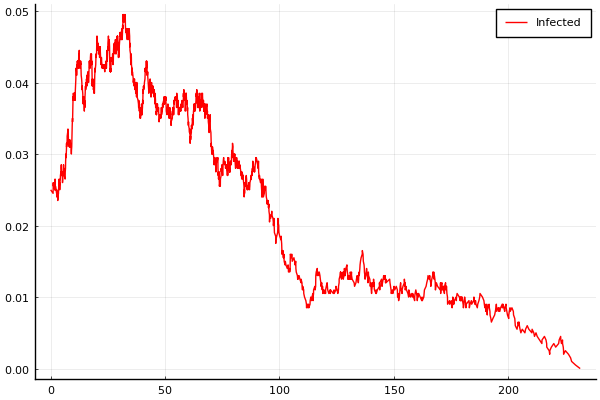

In [97]:
p1 = plot(tV,iV/M,label = "Infected", c=:red)